# INTERMEDIATE ASSESSMENT- NOVEMBER-2022

# SALES PREDICTIONS FOR BIG MART OUTLETS

# Objective:

-Exploratory Data Analysis

-Pre-processing

-Modelling

-Fine tuning

************************************
-->Importing the required libraries
************************************

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

*****
--> Importing dataset
***

In [2]:
#training dataset
traindata = pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\train_v9rqX0R.csv')
#testing dataset
testdata = pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\test_AbJTz2l.csv')
#copy of testing dataest
testdatacopy=pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\test_AbJTz2l.csv')

****
--> Analysing dataset
****

1. Training dataset

In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
traindata.shape

(8523, 12)

In [5]:
traindata.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
traindata.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

2. Testing dataset

In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
testdata.shape

(5681, 11)

In [9]:
testdata.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
testdata.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1

->Here, 'Item_Outlet_Sale' is the target column in the train dataset

****
--> Exploratory data analysis
*****

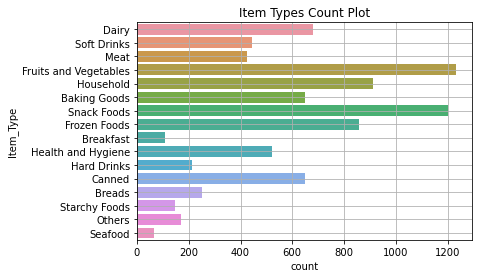

In [11]:
sns.countplot(y='Item_Type',data = traindata)
plt.title('Item Types Count Plot')
plt.grid()

There are 16 items in total , with 'Fruits and Vegetables' and 'Snack foods' holding largest counts, and 'Breakfast' and 'Seafood' holding smallest counts

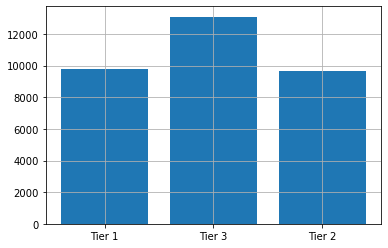

In [12]:
plt.bar(traindata['Outlet_Location_Type'],traindata['Item_Outlet_Sales'])
plt.grid()

There are mainly 3 types of outlet locations, Tier 3 have comparitively large amount sales with more than the other 2.

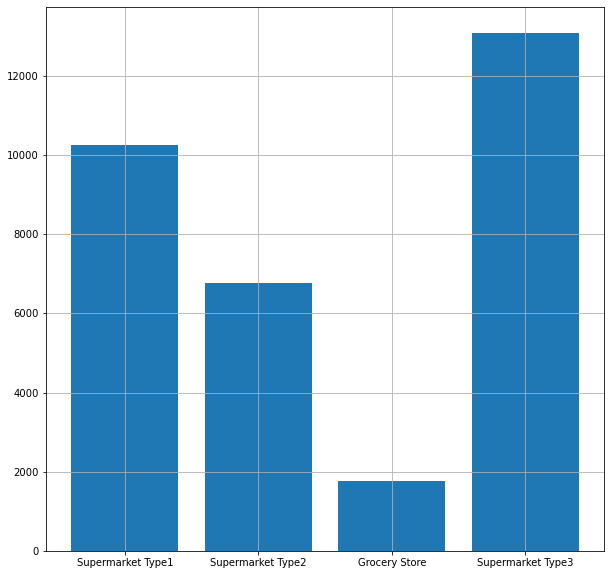

In [13]:
fig = plt.figure(figsize = (10,10))
plt.bar(data = traindata, x ='Outlet_Type',height = 'Item_Outlet_Sales')
plt.grid()

'Supermarket Type 3' have resulting in maximum sales and Least sales is reported by 'Grocery Store'.

********
Data preprocessing
*****

1. Training dataset

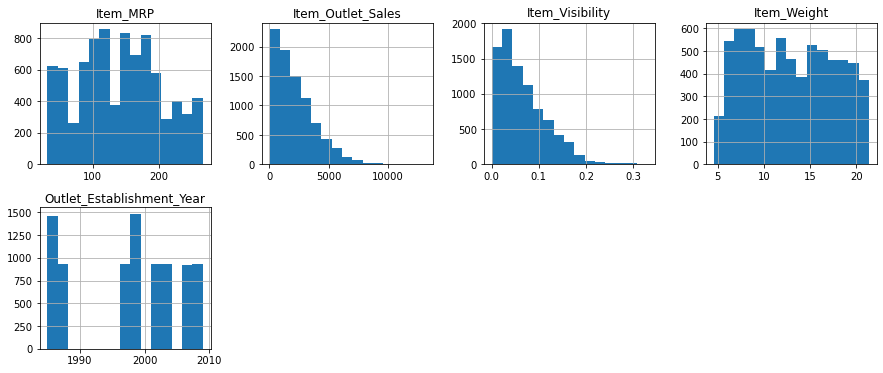

In [14]:
traindata[list(traindata.columns)].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

In [15]:
#filling missing values in 'Outlet_size' categorical data in train dataset using mode
mode_outlet_train = traindata['Outlet_Size'].mode()[0]
traindata['Outlet_Size'] = traindata['Outlet_Size'].fillna(mode_outlet_train)

In [16]:
#filling missing values in 'Item_weight' numerical data in train dataset using median
median_weight_train = traindata['Item_Weight'].median()
traindata['Item_Weight'] = traindata['Item_Weight'].fillna(median_weight_train)

In [17]:
print(traindata['Item_Fat_Content'].unique())
print(traindata['Outlet_Size'].unique())
print(traindata['Outlet_Location_Type'].unique())
print(traindata['Outlet_Type'].unique())
print(traindata['Item_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [18]:
#cleaning and encoding the above categorical data columns
traindata['Item_Fat_Content'] = traindata['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [19]:
traindata['Item_Fat_Content'] = traindata['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [20]:
traindata['Outlet_Size'] = traindata['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})

In [21]:
traindata['Outlet_Location_Type'] = traindata['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

In [22]:
#dropping unimportant columns
traindata.drop('Item_Identifier', axis = 1, inplace = True)
traindata.drop('Outlet_Identifier',axis = 1, inplace = True)

In [23]:
#scaling dataset
scale_cols = ['Item_Weight','Item_Visibility','Item_MRP']

In [24]:
sc = StandardScaler()
traindata.loc[:,scale_cols] = sc.fit_transform(traindata[scale_cols])

In [25]:
le = LabelEncoder()
traindata['Outlet_Type'] = le.fit_transform(traindata['Outlet_Type'])
traindata['Item_Type'] = le.fit_transform(traindata['Item_Type'])

2. Testing dataset

In [26]:
#repeating all preprocessing steps for test dataset

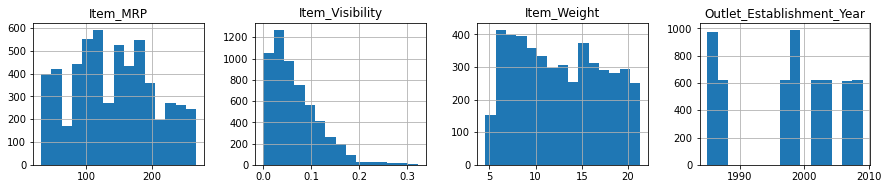

In [27]:
testdata[list(testdata.columns)].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

In [28]:
mode_outlet_test = testdata['Outlet_Size'].mode()[0]
testdata['Outlet_Size'] = testdata['Outlet_Size'].fillna(mode_outlet_test)

median_weight_test = testdata['Item_Weight'].median()
testdata['Item_Weight'] = testdata['Item_Weight'].fillna(median_weight_test)


In [29]:
testdata['Item_Fat_Content'] = testdata['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
testdata['Item_Fat_Content'] = testdata['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
testdata['Outlet_Size'] = testdata['Outlet_Size'].map({'Medium':1,'High':2, 'Small':0})
testdata['Outlet_Location_Type'] = testdata['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3, 'Tier 2':2})

In [30]:
testdata.drop('Item_Identifier', axis = 1, inplace = True)
testdata.drop('Outlet_Identifier',axis = 1, inplace = True)

In [31]:
testdata.loc[:,scale_cols] = sc.fit_transform(testdata[scale_cols])

In [32]:
testdata['Outlet_Type'] = le.fit_transform(testdata['Outlet_Type'])
testdata['Item_Type'] = le.fit_transform(testdata['Item_Type'])

***********
--> Data Modelling
*********

In [33]:
x = traindata.drop('Item_Outlet_Sales',axis=1)
y = pd.DataFrame(traindata['Item_Outlet_Sales'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Linear Regression model

In [35]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

In [36]:
print(mean_squared_error(y_test,y_pred))
print("\n")
print(y_pred)

1516212.795234515


[[ 661.77730893]
 [1227.82868134]
 [2590.02651547]
 ...
 [2006.98450232]
 [ 693.50522437]
 [ 908.27877807]]


KNN Regressor model

In [37]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [38]:
print(mean_squared_error(y_test, y_pred_knn))
print("\n")
print(y_pred_knn)

1402419.3970529113


[[ 378.06343333]
 [1645.5247    ]
 [2790.7007    ]
 ...
 [2061.6497    ]
 [1037.03898333]
 [1226.18166667]]


Randomforest Regression model 

In [39]:
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

In [40]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))
print("\n")
print(y_pred_rf)

1282476.13


[ 309.54246433 1441.55947818 2504.74240854 ... 2088.29250042  710.12035223
  999.49603316]


-> Hence, Randomforest regressor gives relatively low mean-square-error value

********
--> Fine Tuning
********

Tuning of Random Forest Regressor model using Hyperopt

In [41]:
space = {
    "max_depth": hp.choice("max_depth", [5,10,15,20]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1,2,3,4,5]),
    "min_samples_split":hp.choice("min_samples_split",[2,3,4,5,6]),
    "n_estimators": hp.choice("n_estimators", [50,100,200,400,600]),
}

In [42]:
def hyperparameter_tuning(params):
    clf = RandomForestRegressor(**params)
    score=mean_squared_error(y_test, y_pred_rf)
    return score

In [43]:
#initialising trial objects
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|███████████████████████████████████████████████| 50/50 [00:00<00:00, 135.97trial/s, best loss: 1282476.1326598315]
Best: {'max_depth': 1, 'min_samples_leaf': 0, 'min_samples_split': 2, 'n_estimators': 0}


MSE after tuning

In [44]:
rf_reg = RandomForestRegressor(random_state=45,max_depth=15,n_estimators=50,min_samples_split=4,min_samples_leaf=3)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

In [45]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))
print("\n")
print(y_pred_rf)

1286386.87


[ 348.70169032 1405.26177661 2488.01631077 ... 2235.015292    709.42461306
 1100.45320215]


--> Prediction

In [46]:
y_pred_rf = rf_reg.predict(testdata)
print(y_pred_rf)

[1784.34228805 1466.43236348  465.07909047 ... 2003.97653145 4186.58608099
 1354.29709437]


*********************
--> Creation of submision csv file, having IDs and predictions
**************

In [47]:
submission = pd.DataFrame()
submission[["Item_Identifier","Outlet_Identifier"]] = testdatacopy[["Item_Identifier","Outlet_Identifier"]]
submission["Item_Outlet_Sales"] = abs(y_pred_rf)

In [48]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1784.342288
1,FDW14,OUT017,1466.432363
2,NCN55,OUT010,465.079090
3,FDQ58,OUT017,2010.389746
4,FDY38,OUT027,5645.294957


In [49]:
submission.to_csv('submission.csv',index=False)